In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [3]:
df.shape

(1000, 9)

In [4]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [5]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [6]:
df.isna()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [8]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [9]:
mean_sales = df['Total Amount'].mean()
median_sales = df['Total Amount'].median()
mode_sales = df['Total Amount'].mode()[0]
std_dev_sales = df['Total Amount'].std()

print(f"Mean: {mean_sales}")
print(f"Median: {median_sales}")
print(f"Mode: {mode_sales}")
print(f"Standard Deviation: {std_dev_sales}")

Mean: 456.0
Median: 135.0
Mode: 50
Standard Deviation: 559.997631555123


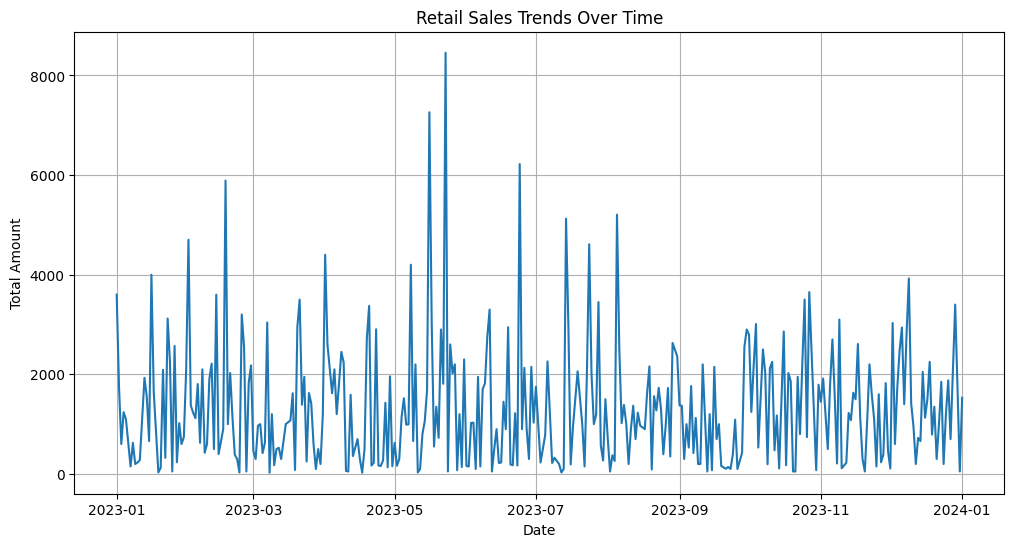

In [10]:
df['Date']= pd.to_datetime(df['Date'])
sales_by_date = df.groupby('Date')['Total Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Total Amount'])
plt.title('Retail Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

In [11]:
customer_demographics= df.groupby('Customer ID').agg({'Age':'mean','Gender':'first'}).reset_index()
print("Customer Demographics:")
print(customer_demographics.head())

Popular_products= df['Product Category'].value_counts().head(5)
print("\nMost Popular Products:")
print(Popular_products)

repeat_customers = df[df['Quantity'] ==1]['Customer ID'].nunique()
print("\nNumber of Repeat Customers:",repeat_customers)

Customer Demographics:
  Customer ID   Age  Gender
0     CUST001  34.0    Male
1     CUST002  26.0  Female
2     CUST003  50.0    Male
3     CUST004  37.0    Male
4     CUST005  30.0    Male

Most Popular Products:
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

Number of Repeat Customers: 253


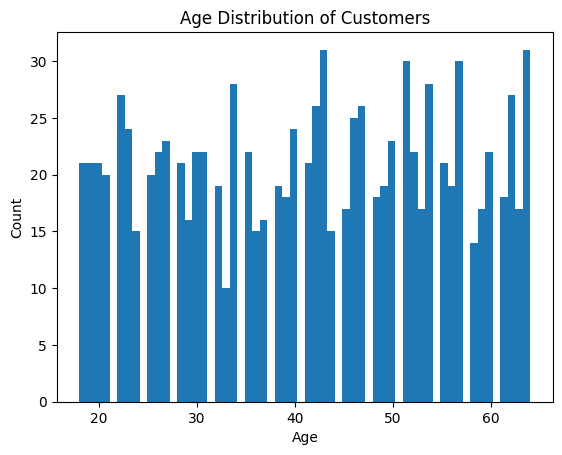

In [12]:
shh =df['Age'].plot(kind = 'hist',bins=60, title='Age Distribution of Customers')
_ = shh.set_xlabel('Age')
_ = shh.set_ylabel('Count')

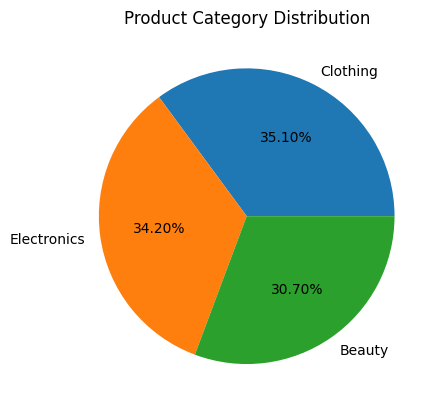

In [13]:
category_counts = df['Product Category'].value_counts()
shh = category_counts.plot(kind='pie',autopct='%1.2f%%', title='Product Category Distribution')
_= shh.set_ylabel(None)

<Figure size 1100x800 with 0 Axes>

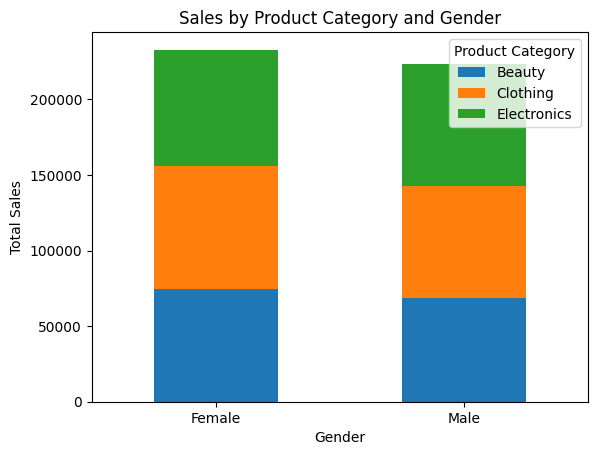

In [14]:
gender_category_sales = df.groupby(['Gender','Product Category'])['Total Amount'].sum().unstack()

plt.figure(figsize=(11,8))
gender_category_sales.plot(kind='bar',stacked=True)
plt.title('Sales by Product Category and Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'Beauty'), Text(1, 0, 'Clothing'), Text(2, 0, 'Electronics')])

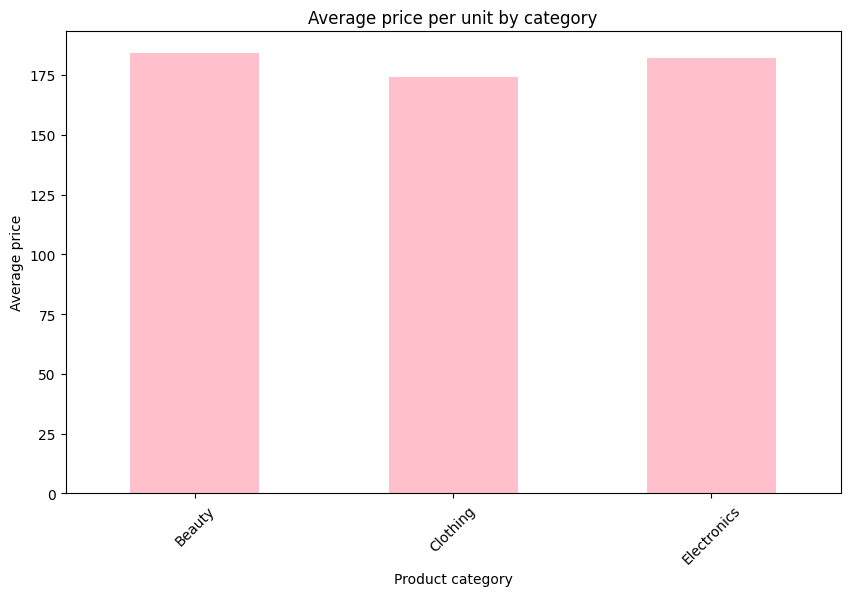

In [15]:
avg_price_by_category = df.groupby('Product Category')['Price per Unit'].mean()

plt.figure(figsize=(10,6))
avg_price_by_category.plot(kind='bar', color='pink')
plt.title('Average price per unit by category')
plt.xlabel('Product category')
plt.ylabel('Average price')
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Beauty'), Text(1, 0, 'Clothing'), Text(2, 0, 'Electronics')])

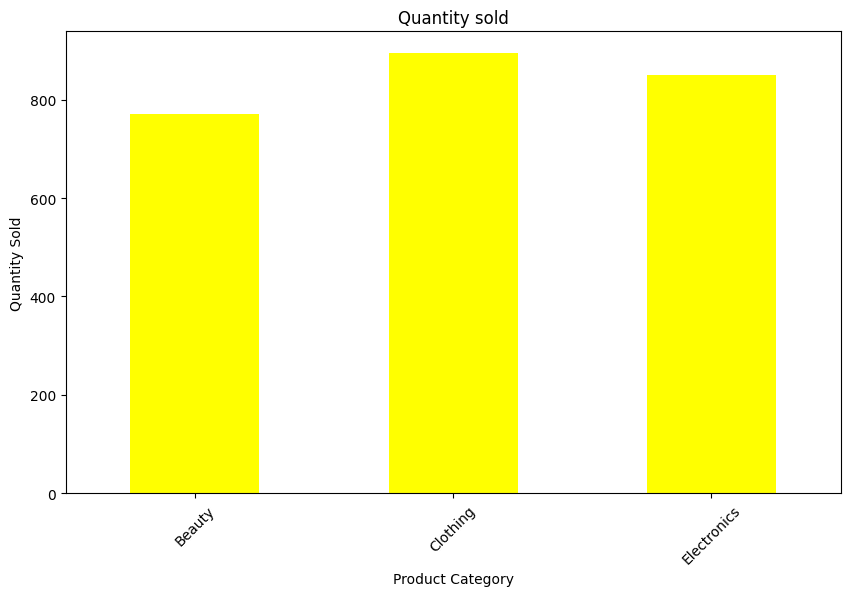

In [16]:
quantity_by_category = df.groupby('Product Category')['Quantity'].sum()

plt.figure(figsize=(10,6))
quantity_by_category.plot(kind='bar',color='yellow')
plt.title('Quantity sold')
plt.xlabel('Product Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Beauty'), Text(1, 0, 'Clothing'), Text(2, 0, 'Electronics')])

<Figure size 1200x1800 with 0 Axes>

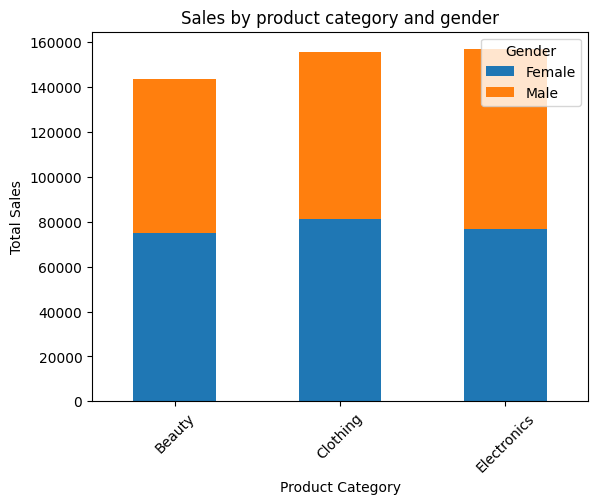

In [17]:
category_gender_sales = df.groupby(['Product Category','Gender'])['Total Amount'].sum().unstack()

plt.figure(figsize=(12,18))
category_gender_sales.plot(kind='bar',stacked=True)
plt.title('Sales by product category and gender')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

In [18]:
mean_sales = df['Total Amount'].mean()
if mean_sales >1000:
    print("recommendation 1:Increase marketing efforts for high-selling products.")
if repeat_customers > 0.5:
    print("Recommendation 2: Implement a loyalty program to retain repeat customers.")
if (Popular_products == 'Product A').any():
    print("Recommendation 3: Increase inventory for Product A to meet high demand.")

Recommendation 2: Implement a loyalty program to retain repeat customers.
